### Modeling Application Data

Step 3: Using the preprocessed data, we evaluate a number of candidate ML Classification algorithms, tune the best performing one, and look at our prediction performance.  We'll also do some dimensionality reduction to optimize for future steps.

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visuals as vs

from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

# Pretty display for notebooks
%matplotlib inline

# Show all of the data in a dataframe
pd.set_option('display.max_columns', None)

### Load Data

In [30]:
# Training Set
application_train = pd.read_csv('data/tmp/application_train_preprocessed_outliers_removed.csv', index_col=0)
application_test = pd.read_csv('data/tmp/application_test_preprocessed_outliers_removed.csv', index_col=0)
print("Loaded Training Set: {0} rows {1} cols".format(application_train.shape[0], application_train.shape[1]))
print("Loaded Testing Set: {0} rows {1} cols".format(application_test.shape[0], application_train.shape[1]))

Loaded Training Set: 307511 rows 270 cols
Loaded Testing Set: 48744 rows 270 cols


In [31]:
display(application_train.head())
display(application_test.head())

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_

### Performance Metric

In [32]:
from sklearn.metrics import fbeta_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = beta_score(y_true, y_predict, beta=0.5)
    
    # Return the score
    return score

### Define Target Criteria

In [34]:
# Our goal is to identify clients with payment difficulties
# This is defined by the TARGET feature (1 = payment difficulites, 0 = pays as expected)
target_train = application_train['TARGET']
application_train_no_target = application_train.drop('TARGET', axis = 1)

# Note: There's no TARGET column in Kaggle's test set.
application_test_no_target = application_test.drop('TARGET', axis=1)

# We don't want to include the unique identifiers because our classifier would interpret them as a feature
application_train_noID = application_train_no_target.drop('SK_ID_CURR', axis=1)
application_test_noID = application_test_no_target.drop('SK_ID_CURR', axis=1)

'''
# NOTE: I figured this out in future analysis and just backported the results here to play around with the effect
# of reducing the dataset.  It's not ideal, and it doesn't help.

strong_correlations = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 
 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'LOG_AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 
 'REG_CITY_NOT_LIVE_CITY', 'BOOL_FLAG_EMP_PHONE', 'DAYS_EMPLOYED', 'REG_CITY_NOT_WORK_CITY', 
 'DAYS_ID_PUBLISH', 'LOG_DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH']

application_train_strong_correlations = application_train_noID[strong_correlations]
application_test_strong_correlations = application_test_noID[strong_correlations]
'''


"\n# NOTE: I figured this out in future analysis and just backported the results here to play around with the effect\n# of reducing the dataset.  It's not ideal, and it doesn't help.\n\nstrong_correlations = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', \n 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'LOG_AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', \n 'REG_CITY_NOT_LIVE_CITY', 'BOOL_FLAG_EMP_PHONE', 'DAYS_EMPLOYED', 'REG_CITY_NOT_WORK_CITY', \n 'DAYS_ID_PUBLISH', 'LOG_DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH']\n\napplication_train_strong_correlations = application_train_noID[strong_correlations]\napplication_test_strong_correlations = application_test_noID[strong_correlations]\n"

### Shuffle and Split Data

In [35]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split  # use model_selection to suppress deprecation warning

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(application_train_noID, target_train, test_size=0.3, random_state=23)

# Success
print("Training and testing split was successful.")
print(X_train.shape)
print(X_test.shape)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.
(215257, 268)
(92254, 268)
Training and testing split was successful.


### Naive Predictor Peformance

For the sake of getting a benchmark to compare against, our naive model will assume that everyone pays back their loans on time (TARGET = 0).  The vast majority of people in this dataset pay back their loans on time, so we expect the naive predictor to achieve a high accuracy score and a low F1 score.

In [36]:
from sklearn.metrics import fbeta_score

# In this instance, we'll assume that TARGET always equals 0 (i.e. the borrower pays the loan as expected)

# True Positives - TARGET = 0
# False Positives - TARGET = 1

FP = np.sum(y_train) # All the records with payment problems (which are erroneously flagged as good)
TP = y_train.count() - FP # All the records, less the false positives

FN = 0 # All predicted values are False, so we have no False negatives
TN = 0 # All predicted values are False, so we have no True Negatives

# TODO: Calculate accuracy, precision and recall
accuracy = TP / y_train.count()
recall = TP / TP + FN
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + (beta **2)) * ((precision * recall) / (((beta ** 2 ) * precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
print("Number of Records with Payment Problems: {0}".format(np.sum(y_train)))
print("Total Number of Records: {0}".format(y_train.count()))
print("Percent of Records with Payment Problems: {0}%".format((np.sum(y_train) / y_train.count())*100))

Naive Predictor: [Accuracy score: 0.9190, F-score: 0.9341]
Number of Records with Payment Problems: 17441
Total Number of Records: 215257
Percent of Records with Payment Problems: 8.10240781949019%


### Training and Prediction Pipeline

In [37]:
# Borrowed from the CharityML Project exercise

# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from time import clock
'''
inputs:
   - learner: the learning algorithm to be trained and predicted on
   - sample_size: the size of samples (number) to be drawn from training set
   - X_train: features training set
   - y_train: income training set
   - X_test: features testing set
   - y_test: income testing set
'''

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
        
    results = {}
    
    if (sample_size == -1): 
        sample_size = len(X_train)
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = clock() # Get start time
    learner = learner
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = clock() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    start = clock() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:sample_size])
    end = clock() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(predictions_train, y_train[:sample_size])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(predictions_test, y_test)
    
    # We want to minimize false positives by favoring precision, so we'll set beta to > 1
    results['f_train'] = fbeta_score(y_train[:sample_size], predictions_train, 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
    
    # Returns the results of our predictions, in case we want to submit them to Kaggle
    results['predictions_test'] = predictions_test
    
    results['score'] = learner.score
    
    
    # Success
    print("Test Accuracy {0}, Test F-Score {1}\n, Predicted_Test {2}, Predicted_Train {3}\n, Actual Test {4}, Actual Train {5}".format(\
        results['acc_test'], results['f_test'], np.sum(predictions_test), np.sum(predictions_train), np.sum(y_test), np.sum(y_train)))
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Initial Model Validation

Number of Positive Samples in 100% 17441 10% 1830 1% 192


/Users/jeclark/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Test Accuracy 0.8017863724066165, Test F-Score 0.15939107059373542
, Predicted_Test 15266, Predicted_Train 376
, Actual Test 7384, Actual Train 17441
Perceptron trained on 2152 samples.
Test Accuracy 0.8648513885576777, Test F-Score 0.19092002405291644
, Predicted_Test 8132, Predicted_Train 1781
, Actual Test 7384, Actual Train 17441
Perceptron trained on 21525 samples.
Test Accuracy 0.919895072300388, Test F-Score 0.0013469827586206895
, Predicted_Test 10, Predicted_Train 23
, Actual Test 7384, Actual Train 17441
Perceptron trained on 215257 samples.
Test Accuracy 0.9194181282112429, Test F-Score 0.01037344398340249
, Predicted_Test 82, Predicted_Train 151
, Actual Test 7384, Actual Train 17441
RandomForestClassifier trained on 2152 samples.
Test Accuracy 0.9189845426756563, Test F-Score 0.026582591493570725
, Predicted_Test 176, Predicted_Train 1481
, Actual Test 7384, Actual Train 17441
RandomForestClassifier trained on 21525 samples.
Test Accuracy 0.9192446939970083, Test F-Score 0

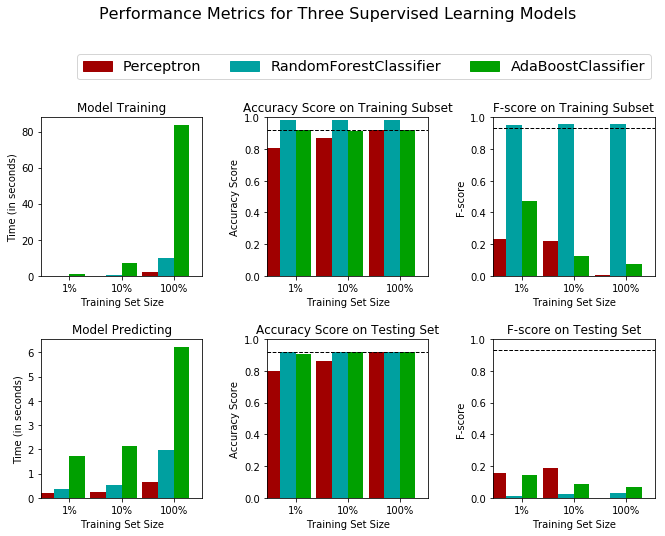

In [38]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron


# TODO: Initialize the three models
# NOTE: Seeded random_state per review feedback
#clf_A = svm.SVC(random_state = 42)
clf_A = Perceptron(random_state = 42)
clf_B = RandomForestClassifier(random_state = 42)
clf_C = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1, n_estimators=100, random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

print("Number of Positive Samples in 100% {0} 10% {1} 1% {2}".format(np.sum(y_train),np.sum(y_train[:samples_10]),np.sum(y_train[:samples_1])))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

### Model Tuning

In [44]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier

# NOTE: This takes a long time to run, and there's no reason to keep running it.
# Feel free to remove the block comment if you want to see this in action... 
'''
parameters = {'algorithm':['SAMME', 'SAMME.R'], 'n_estimators':[50,100,250,500,1000], 'learning_rate':[1, .9, .8, .7],'random_state':[42]}
AdaBoostClassifier()

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)
'''

/Users/jeclark/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jeclark/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jeclark/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jeclark/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jeclark/.local/lib/python3.6/site-packages/sklearn/metric

Unoptimized model
------
Accuracy score on testing data: 0.9200
F-score on testing data: 0.0687

Optimized Model
------
Final accuracy score on the testing data: 0.9197
Final F-score on the testing data: 0.1106
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=1000, random_state=42)


### Model Optimization Results

###### Naive Model

Naive Predictor: Accuracy score: 0.9190, F-score: 0.9341

#### With Outliers
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=100, random_state=42)

###### Unoptimized model
- Accuracy score on testing data: 0.91688108971623
- F-score on testing data: 0.08198935103017209

##### Optimized Model 
- Final accuracy score on the testing data: 0.9200
- Final F-score on the testing data: 0.0687  <--- depressing... ugh

#### Without Outliers (IQR, Step = IQR Median x 4)

Optimized Model
------
- Final accuracy score on the testing data: 0.9197
- Final F-score on the testing data: 0.1106
- AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=1000, random_state=42)


### Feature Importance

In [39]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Precalculate this for the Dimensionality Reduction section
original_predictions = clf.predict(X_test)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

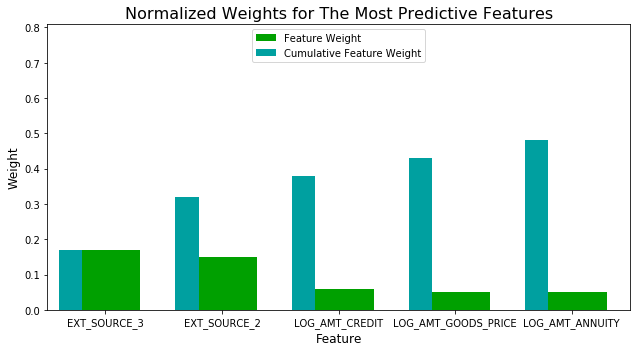

array(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'LOG_AMT_CREDIT',
       'LOG_AMT_GOODS_PRICE', 'LOG_AMT_ANNUITY', 'DAYS_EMPLOYED',
       'DAYS_BIRTH', 'EXT_SOURCE_1', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'LOG_OWN_CAR_AGE',
       'REGION_RATING_CLIENT_W_CITY', 'CODE_GENDER_M',
       'ORGANIZATION_TYPE_Self-employed',
       'ORGANIZATION_TYPE_Trade: type 2', 'REGION_POPULATION_RELATIVE',
       'ORGANIZATION_TYPE_Transport: type 3', 'FLAG_DOCUMENT_16',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_13',
       'LOG_DAYS_LAST_PHONE_CHANGE', 'ORGANIZATION_TYPE_Realtor',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'ORGANIZATION_TYPE_Construction', 'HOUR_APPR_PROCESS_START_17',
       'OCCUPATION_TYPE_Core staff', 'NAME_INCOME_TYPE_Working',
       'NAME_CONTRACT_TYPE_Cash loans', 'LOG_DEF_60_CNT_SOCIAL_CIRCLE',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_FAMILY_STATUS_Married',
       'NAME_HO

In [16]:
# Plot
vs.feature_plot(importances, X_train, y_train)

display(X_train.columns.values[indices[:100]])

### Dimensionality Reduction
Just looking at what we could reasonably achieve with dimensionality reduction at this point.

In [40]:
# Create a model with the reduced feature space
reduced_clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=100, random_state=42)

fields = X_train.columns.values[(np.argsort(importances)[::-1])[:40]]

# Reduce the feature space
X_train_reduced = X_train[fields]
X_test_reduced = X_test[fields]

reduced_clf.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = reduced_clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, original_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, original_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.9200
F-score on testing data: 0.0687

Final Model trained on reduced data
------
Accuracy on testing data: 0.9198
F-score on testing data: 0.0693


In [53]:
# Export strong correlations for later use
df_fields = pd.DataFrame(data=fields, columns=['features'])
df_fields.to_csv('data/tmp/bureau_important_fields.csv')

,features
0,EXT_SOURCE_3
1,EXT_SOURCE_2
2,LOG_AMT_CREDIT
3,LOG_AMT_GOODS_PRICE
4,LOG_AMT_ANNUITY
5,DAYS_EMPLOYED
6,DAYS_BIRTH
7,EXT_SOURCE_1
8,DAYS_ID_PUBLISH
9,DAYS_REGISTRATION


### Generate Kaggle Submission

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1, n_estimators=1000, random_state=42)
clf.fit(application_train_noID, target_train)
predictions = clf.predict(application_test_noID)

#results = train_predict(clf, -1, application_train_noID, target_train, application_test_noID, target_test)

In [ ]:
d = {'SK_ID_CURR': application_test_no_target['SK_ID_CURR'], 'TARGET': predictions}
sub = pd.DataFrame(data=d)

print("Number of records flagged {0}".format(np.sum(sub['TARGET'])))

sub.to_csv('data/tmp/submission_bureau.csv', index=False)

### Kaggle Results

#### With Outliers: 

Score 0.507 (using ROC AUC).  

This correlates pretty well with my fscore of ~0.0687.

#### WIthout Outliers

Score: 0.525